# Table of Contents
 <p><div class="lev2 toc-item"><a data-toc-modified-id="check-output-01" href="#check-output"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>check output</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Code-optimisation-02" href="#Code-optimisation"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Code optimisation</a></div><div class="lev3 toc-item"><a data-toc-modified-id="unoptimised-021" href="#unoptimised"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>unoptimised</a></div><div class="lev3 toc-item"><a data-toc-modified-id="optimised-022" href="#optimised"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>optimised</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Numba-023" href="#Numba"><span class="toc-item-num">0.2.3&nbsp;&nbsp;</span>Numba</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Revamp-1" href="#Revamp"><span class="toc-item-num">1&nbsp;&nbsp;</span>Revamp</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Excess-coverage-filtering-11" href="#Excess-coverage-filtering"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Excess coverage filtering</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Minimum-coverage-filtering-12" href="#Minimum-coverage-filtering"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Minimum coverage filtering</a></div><div class="lev2 toc-item"><a data-toc-modified-id="check-output-13" href="#check-output"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>check output</a></div>

I have created a depth file with the `samtools depth` command.

In [1]:
% ll

total 2539240
-rw-rw-r-- 1 claudius  11524483 Apr 29 14:49 Big_Data_Contigs.noSEgt2.bed
-rw-rw-r-- 1 claudius  24138906 Apr 29 14:56 Big_Data_Contigs.noSEgt2.noDUST.bed
-rw-rw-r-- 1 claudius  24098532 Apr 29 17:35 Big_Data_Contigs.noSEgt2.noDUST.noTGCAGG.bed
lrwxrwxrwx 1 claudius        24 Apr 29 14:39 Big_Data_Contigs.SEposgt2 -> exclude_contigs.SEposgt2
lrwxrwxrwx 1 claudius        26 Apr 29 14:32 Big_Data_ref.fa.bed -> ../BAM/Big_Data_ref.fa.bed
-rw-rw-r-- 1 claudius  49174018 Apr 29 12:24 ery_30-10_dedup.bam
-rw-rw-r-- 1 claudius  45669443 Apr 29 12:59 ery_30-10_dedup.sorted.bam
-rw-rw-r-- 1 claudius  41549836 Apr 29 12:25 ery_30-11_dedup.bam
-rw-rw-r-- 1 claudius  38823165 Apr 29 12:59 ery_30-11_dedup.sorted.bam
-rw-rw-r-- 1 claudius  32949722 Apr 29 12:25 ery_30-12_dedup.bam
-rw-rw-r-- 1 claudius  31074190 Apr 29 12:59 ery_30-12_dedup.sorted.bam
-rw-rw-r-- 1 claudius  29451529 Apr 29 12:25 ery_30-13_dedup.bam
-rw-rw-r-- 1 claudius  27837104 Apr 29 13:00 ery_30-13_dedup.sorted.bam

In [3]:
! zcat ParEry.noSEgt2.noDUST.noTGCAGG.depth.gz | wc -l

85488084


The depth file contains the coverage information for 85,488,084 sites.

In [4]:
! zcat ParEry.noSEgt2.noDUST.noTGCAGG.depth.gz | head

Contig_29981	8	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	9	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	10	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	11	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	12	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	13	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	14	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	15	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4
Contig_29981	16	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	3	5	5	3	4
Contig_29981	17	10	6	6	4	3	8	2	5	5	4	10	8	3	9	6	6	6	12	4	6	1	1	7	3	4	1	7	2	6	1	4	4	5	5	3	4

gzip: stdout: Broken pipe


The first column contains the contig id, the second the position in the contig (1-based coordinates). The remaining 36 columns contain the coverage information for each of the 36 individuals.

I would like to get the 99th percentile of the coverage distribution of each individual from this as well as the 99th percentile of the global coverage distribution.

During a first read through the depth file I want to compress the coverage information into dictionaries and use them to determine percentiles of the coverage distribution. Although, in terms of programming, reading in all columns of the depth file into very long lists would make it straightforward to get the percentiles, this would require a substantial amount of memory, also for the required sorting of such large lists. I therefore consider this bad programming.

In [5]:
import gzip

# get open file handle for gzipped depth file

depth_fh = gzip.open("ParEry.noSEgt2.noDUST.noTGCAGG.depth.gz")

In [6]:
from collections import defaultdict

In [7]:
# initialisze global coverage count dictionary
global_cov_dist = defaultdict(int)

In [8]:
depth_fh.seek(0)

i = 0
for line in depth_fh:
    i+=1
    if i > 1000: break
    fields = line.rstrip().split('\t')
    depths = fields[2:]
    across_sample_depth = sum([int(d) for d in depths])
    global_cov_dist[across_sample_depth] += 1

I would like to get the coverage that lies at or just below the 99th percentile of the coverage distribution. Later I would like to discard all sites with coverage greater than this coverage.

In [30]:
def compute_percentile_from_dict(my_dict, percentile):
    """
    my_dict : dictionary, containing depths as keys and their counts as values
    percentile : float in range of [0,100], percentile to compute, which must be between 0 and 100 inclusive.
    
    returns : key in my_dict that is less than or equal to the specified percentile of the distribution of "keys"
            (i. e. values are counts) stored in my_dict
    """
    assert percentile < 100 and percentile > 0, "percentile must be a number between 0 and 100"

    # get sum of counts
    total_cnt = sum(my_dict.values())
    
    perc = float() # initialise percentile of the coverage distribution
    cum_cnt = float()
    
    for d in sorted(my_dict.keys(), reverse=True): # search from the upper tail of the distribution
        cum_cnt += my_dict[d]
        perc = cum_cnt / total_cnt * 100
        if perc < (100 - percentile):
            continue
        else:
            return d

In [29]:
print "coverage \t count \t cumsum_cnt \t percentile"
cumsum_cnt = int()
total_cnt = float( sum(global_cov_dist.values()) )
percentile = float()
for k in sorted(global_cov_dist.keys(), reverse=True):
    cumsum_cnt += global_cov_dist[k]
    percentile = cumsum_cnt / total_cnt * 100
    print "{0:5d} \t {1:10d} \t {2:5d} \t {3:>15.2f}".format(k, global_cov_dist[k], cumsum_cnt, percentile)

coverage 	 count 	 cumsum_cnt 	 percentile
  181 	         34 	    34 	            3.40
  180 	          3 	    37 	            3.70
  179 	          1 	    38 	            3.80
  178 	          2 	    40 	            4.00
   86 	         35 	    75 	            7.50
   85 	          3 	    78 	            7.80
   82 	          6 	    84 	            8.40
   81 	          3 	    87 	            8.70
   80 	          1 	    88 	            8.80
   79 	          3 	    91 	            9.10
   78 	          1 	    92 	            9.20
   75 	          2 	    94 	            9.40
   74 	         37 	   131 	           13.10
   73 	          6 	   137 	           13.70
   72 	          1 	   138 	           13.80
   71 	          1 	   139 	           13.90
   68 	          7 	   146 	           14.60
   67 	          2 	   148 	           14.80
   66 	          1 	   149 	           14.90
   65 	          2 	   151 	           15.10
   63 	          1 	   152 	           15.20
   62 	     

In [31]:
compute_percentile_from_dict(global_cov_dist, 90)

74

In [32]:
compute_percentile_from_dict(global_cov_dist, 99)

181

In [33]:
compute_percentile_from_dict(global_cov_dist, 50)

26

The funciton seems to work.

In [38]:
coverage_threshold = compute_percentile_from_dict(global_cov_dist, 50)
coverage_threshold

26

In [40]:
depth_fh.seek(0) # restart reading file from beginning

i = 0
for line in depth_fh:
    i+=1
    if i > 100: break
    fields = line.rstrip().split('\t')
    depths = fields[2:]
    across_sample_depth = sum([int(d) for d in depths])
    print across_sample_depth
    if not across_sample_depth > coverage_threshold:
        print '\t'.join(fields)

181
181
181
181
181
181
181
181
180
181
181
181
179
181
181
181
181
181
181
181
181
181
181
181
181
181
181
181
178
178
181
181
181
181
180
181
181
181
181
180
7
Contig_29981	48	2	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	2	0	0	0	0
3
Contig_29981	49	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0
4
Contig_29981	57	0	0	0	0	0	0	0	0	0	0	0	1	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
8
Contig_29981	58	0	0	0	0	0	0	0	0	0	0	0	1	0	0	2	2	0	0	0	0	0	0	0	0	0	0	0	0	2	0	0	0	0	0	0	1
10
Contig_29981	59	0	0	0	0	0	0	0	0	0	0	0	1	0	1	2	2	0	0	0	0	0	0	1	0	0	0	0	0	2	0	0	0	0	0	0	1
14
Contig_29981	60	0	0	0	0	0	0	0	0	0	0	1	1	0	1	2	2	0	0	0	0	0	0	1	0	0	0	0	1	2	0	1	0	1	0	0	1
15
Contig_29981	61	0	1	0	0	0	0	0	0	0	0	1	1	0	1	2	2	0	0	0	0	0	0	1	0	0	0	0	1	2	0	1	0	1	0	0	1
19
Contig_29981	62	0	1	0	0	0	0	0	0	0	0	1	1	0	1	2	2	0	1	0	0	0	1	1	0	1	0	0	1	2	0	1	0	1	0	1	1
25
Contig_29981	63	1	1	0	0	0	1	0	0	0	0	1	1	0	1	2	2	0	1	0	1	0	1	2	1	1	0	0	1	3	0	1	0	1	0	1	1
25
Contig_29981	64	1	1	0	

So this is how I would filter for sites with depth below or equal to a certain global coverage percentile.

But I also want to filter for sites that have individual depths that are below or equal to their respective individual coverage percentiles.

In [41]:
# initialisze global coverage count dictionary
global_cov_dist = defaultdict(int)

depth_fh.seek(0) # go back to beginning of file

# initialise individual coverage count dictionaries
fields = depth_fh.readline().rstrip().split('\t')
ind_cov_dists = dict([(i, defaultdict(int)) for i in range(0, len(fields)-2)])

depth_fh.seek(0) # seek back to beginning of file

i = 0
for line in depth_fh:
    i+=1
    if i > 1000: break
    fields = line.rstrip().split('\t')
    depths = fields[2:]
    # get global coverage
    across_sample_depth = sum([int(d) for d in depths])
    # count global coverages in dictionary
    global_cov_dist[across_sample_depth] += 1
    # count individual coverages in dictionaries
    for idx, d in enumerate(depths):
        ind_cov_dists[idx][int(d)] += 1 

In [42]:
for ind in ind_cov_dists:
    print "showing coverage distribution for individual {}:".format(ind)
    for de, c in ind_cov_dists[ind].items():
        print "{0} : {1}".format(de, c)

showing coverage distribution for individual 0:
0 : 345
1 : 209
2 : 298
3 : 103
4 : 5
8 : 2
10 : 38
showing coverage distribution for individual 1:
0 : 282
1 : 466
2 : 168
3 : 44
5 : 1
6 : 39
showing coverage distribution for individual 2:
0 : 526
1 : 191
2 : 114
3 : 83
4 : 46
6 : 40
showing coverage distribution for individual 3:
0 : 550
1 : 208
2 : 119
3 : 28
4 : 95
showing coverage distribution for individual 4:
0 : 547
1 : 285
2 : 128
3 : 40
showing coverage distribution for individual 5:
0 : 240
1 : 256
2 : 179
3 : 89
4 : 89
5 : 59
6 : 8
8 : 42
9 : 38
showing coverage distribution for individual 6:
0 : 617
1 : 190
2 : 132
3 : 61
showing coverage distribution for individual 7:
0 : 330
1 : 260
2 : 142
3 : 70
4 : 111
5 : 47
7 : 40
showing coverage distribution for individual 8:
0 : 239
1 : 405
2 : 114
3 : 120
4 : 5
5 : 117
showing coverage distribution for individual 9:
0 : 563
1 : 220
2 : 132
3 : 5
4 : 80
showing coverage distribution for individual 10:
0 : 330
1 : 338
2 : 123
3 : 4

The individual coverage count dictionaries seem to work.

Now, let's test whether we can get from these dictionaries global and individual coverage percentiles and use them to filter sites.

In [56]:
# set global coverage threshold to 90th percentile
global_coverage_threshold = compute_percentile_from_dict(global_cov_dist, 90) 
global_coverage_threshold

74

In [55]:
# set indidivual coverage thresholds to 90th percentile
ind_coverage_thresholds = [compute_percentile_from_dict(ind_cov_dists[i], 90) for i in range(36)] 
print ind_coverage_thresholds

[3, 2, 3, 3, 2, 5, 2, 4, 5, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 5, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3]


Now, let's read in a few lines from the depth file and filter for sites that neither have excess global nor excess individual coverage.

In [65]:
depth_fh.seek(0) # restart reading file from beginning

i = 0
for line in depth_fh:
    i+=1
    if i > 100: break
    fields = line.rstrip().split('\t')
    depths = fields[2:]
    across_sample_depth = sum([int(d) for d in depths])
    if across_sample_depth > global_coverage_threshold:
        print "{0}: global depth {1} > {2}".format(i, across_sample_depth, global_coverage_threshold)
        continue
    excess_depth = False
    for idx, d in enumerate(depths):
        if int(d) > ind_coverage_thresholds[idx]:
            print "{0}: individual depth {1} > {2}".format(i, d, ind_coverage_thresholds[idx])
            excess_depth = True
            break
    if not excess_depth:
        print '\t'.join(fields)

1: global depth 181 > 74
2: global depth 181 > 74
3: global depth 181 > 74
4: global depth 181 > 74
5: global depth 181 > 74
6: global depth 181 > 74
7: global depth 181 > 74
8: global depth 181 > 74
9: global depth 180 > 74
10: global depth 181 > 74
11: global depth 181 > 74
12: global depth 181 > 74
13: global depth 179 > 74
14: global depth 181 > 74
15: global depth 181 > 74
16: global depth 181 > 74
17: global depth 181 > 74
18: global depth 181 > 74
19: global depth 181 > 74
20: global depth 181 > 74
21: global depth 181 > 74
22: global depth 181 > 74
23: global depth 181 > 74
24: global depth 181 > 74
25: global depth 181 > 74
26: global depth 181 > 74
27: global depth 181 > 74
28: global depth 181 > 74
29: global depth 178 > 74
30: global depth 178 > 74
31: global depth 181 > 74
32: global depth 181 > 74
33: global depth 181 > 74
34: global depth 181 > 74
35: global depth 180 > 74
36: global depth 181 > 74
37: global depth 181 > 74
38: global depth 181 > 74
39: global depth 181 

The filtering seems to work.

Finally, I would also like to filter for sites that have enough coverage for downstream analysis.

I think at least 1x depth for each of at least 15 individuals would be reasonable.

In [68]:
depth_fh.seek(0) # restart reading file from beginning

i = 0
for line in depth_fh:
    i+=1
    if i > 100: break
    fields = line.rstrip().split('\t')
    depths = fields[2:]
    across_sample_depth = sum([int(d) for d in depths])
    if across_sample_depth > global_coverage_threshold:
        print "{0}: global depth {1} > {2}".format(i, across_sample_depth, global_coverage_threshold)
        continue
    excess_depth = False
    sufficient_depth = 0
    for idx, d in enumerate(depths):
        if int(d) > ind_coverage_thresholds[idx]:
            print "{0}: individual depth {1} > {2}".format(i, d, ind_coverage_thresholds[idx])
            excess_depth = True
            break
        elif int(d) > 0:
            sufficient_depth += 1
    if sufficient_depth < 15:
        print "{0}: only {1} individuals with read data".format(i, sufficient_depth)
    if not excess_depth and sufficient_depth >= 15:
        print '\t'.join(fields)

1: global depth 181 > 74
2: global depth 181 > 74
3: global depth 181 > 74
4: global depth 181 > 74
5: global depth 181 > 74
6: global depth 181 > 74
7: global depth 181 > 74
8: global depth 181 > 74
9: global depth 180 > 74
10: global depth 181 > 74
11: global depth 181 > 74
12: global depth 181 > 74
13: global depth 179 > 74
14: global depth 181 > 74
15: global depth 181 > 74
16: global depth 181 > 74
17: global depth 181 > 74
18: global depth 181 > 74
19: global depth 181 > 74
20: global depth 181 > 74
21: global depth 181 > 74
22: global depth 181 > 74
23: global depth 181 > 74
24: global depth 181 > 74
25: global depth 181 > 74
26: global depth 181 > 74
27: global depth 181 > 74
28: global depth 181 > 74
29: global depth 178 > 74
30: global depth 178 > 74
31: global depth 181 > 74
32: global depth 181 > 74
33: global depth 181 > 74
34: global depth 181 > 74
35: global depth 180 > 74
36: global depth 181 > 74
37: global depth 181 > 74
38: global depth 181 > 74
39: global depth 181 

In [70]:
depth_fh.close()

In [71]:
% ll

total 2539296
-rw-rw-r-- 1 claudius  11524483 Apr 29 14:49 Big_Data_Contigs.noSEgt2.bed
-rw-rw-r-- 1 claudius  24138906 Apr 29 14:56 Big_Data_Contigs.noSEgt2.noDUST.bed
-rw-rw-r-- 1 claudius  24098532 Apr 29 17:35 Big_Data_Contigs.noSEgt2.noDUST.noTGCAGG.bed
lrwxrwxrwx 1 claudius        24 Apr 29 14:39 Big_Data_Contigs.SEposgt2 -> exclude_contigs.SEposgt2
lrwxrwxrwx 1 claudius        26 Apr 29 14:32 Big_Data_ref.fa.bed -> ../BAM/Big_Data_ref.fa.bed
-rwxrwxr-x 1 claudius      4750 Apr 30 14:59 coverage_filter.py*
-rwxrwxr-x 1 claudius      4750 Apr 30 14:59 coverage_filter.py~*
-rw-rw-r-- 1 claudius  49174018 Apr 29 12:24 ery_30-10_dedup.bam
-rw-rw-r-- 1 claudius  45669443 Apr 29 12:59 ery_30-10_dedup.sorted.bam
-rw-rw-r-- 1 claudius  41549836 Apr 29 12:25 ery_30-11_dedup.bam
-rw-rw-r-- 1 claudius  38823165 Apr 29 12:59 ery_30-11_dedup.sorted.bam
-rw-rw-r-- 1 claudius  32949722 Apr 29 12:25 ery_30-12_dedup.bam
-rw-rw-r-- 1 claudius  31074190 Apr 29 12:59 ery_30-12_dedup.sorted.bam
-rw-r

I have put the upper commands in a separate python file.

In [74]:
! ./coverage_filter.py -h

usage: coverage_filter.py [-h]
                          [--global_coverage_percentile GLOBAL_COVERAGE_PERCENTILE]
                          [--individual_coverage_percentile INDIVIDUAL_COVERAGE_PERCENTILE]
                          [--minimum_coverage MINIMUM_COVERAGE]
                          [--minimum_individual MINIMUM_INDIVIDUAL]
                          depth_file

takes output from samtools depth command and filters sites against excessive
and for enough coverage; prints filtered sites to STDOUT

positional arguments:
  depth_file            file name for depth table from samtools depth command

optional arguments:
  -h, --help            show this help message and exit
  --global_coverage_percentile GLOBAL_COVERAGE_PERCENTILE
                        percentile of the global coverage distribution that
                        the site's global coverage must not exceed (default
                        99)
  --individual_coverage_percentile INDIVIDUAL_COVERAGE_PERCENTILE
       

`coverage_filter.py` takes 3h 30min to filter the `samtools depth` file. I think this is quite a long time. I am going to try and speed this up a little bit.

## check output

Read filtered sites into a pandas data frame:

In [2]:
% ll

total 2548100
-rw-rw-r-- 1 claudius  11524483 Apr 29 14:49 Big_Data_Contigs.noSEgt2.bed
-rw-rw-r-- 1 claudius  24138906 Apr 29 14:56 Big_Data_Contigs.noSEgt2.noDUST.bed
-rw-rw-r-- 1 claudius  24098532 Apr 29 17:35 Big_Data_Contigs.noSEgt2.noDUST.noTGCAGG.bed
lrwxrwxrwx 1 claudius        24 Apr 29 14:39 Big_Data_Contigs.SEposgt2 -> exclude_contigs.SEposgt2
lrwxrwxrwx 1 claudius        26 Apr 29 14:32 Big_Data_ref.fa.bed -> ../BAM/Big_Data_ref.fa.bed
-rw-rw-r-- 1 claudius     94511 May  1 11:05 coverage_filter.ipynb
-rwxrwxr-x 1 claudius      4566 May  1 08:11 coverage_filter.py*
-rwxrwxr-x 1 claudius      4487 May  1 08:08 coverage_filter.py~*
-rw-rw-r-- 1 claudius       785 Apr 30 20:58 coverage_filter.time
-rw-rw-r-- 1 claudius  49174018 Apr 29 12:24 ery_30-10_dedup.bam
-rw-rw-r-- 1 claudius  45669443 Apr 29 12:59 ery_30-10_dedup.sorted.bam
-rw-rw-r-- 1 claudius  41549836 Apr 29 12:25 ery_30-11_dedup.bam
-rw-rw-r-- 1 claudius  38823165 Apr 29 12:59 ery_30-11_dedup.sorted.bam
-rw-rw-r-

In [8]:
import pandas as pd

In [12]:
pd.read_table?

In [16]:
# read compressed TAB-delimited file directly into pandas data frame

filtered_sites_df = pd.read_table("ParEry.noSEgt2.noDUST.noTGCAGG.covFiltered.gz", header=None)

In [31]:
filtered_sites_df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,Contig_29981,62,0,1,0,0,0,0,0,0,...,0,1,2,0,1,0,1,0,1,1
1,Contig_29981,63,1,1,0,0,0,1,0,0,...,0,1,3,0,1,0,1,0,1,1
2,Contig_29981,64,1,1,0,0,0,1,0,0,...,0,1,3,0,1,0,1,0,1,1
3,Contig_29981,65,1,1,0,0,0,1,0,0,...,0,1,3,0,1,0,1,0,1,1
4,Contig_29981,66,1,1,0,0,0,1,0,0,...,2,1,3,0,1,0,2,0,1,2
5,Contig_29981,67,1,1,1,0,0,1,0,0,...,2,1,3,0,1,0,2,0,1,2


In [52]:
# get basix statistics from the coverage table

filtered_sites_df.iloc[:, 2:].describe()

,2,3,4,5,6,7,8,9,10,11,...,29,30,31,32,33,34,35,36,37,rowsums
count,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,...,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000,768439.000000
mean,1.167860,1.015306,0.753552,0.656704,0.745813,1.057225,0.776393,0.826999,1.071782,0.732000,...,0.157331,0.617698,0.488221,0.376844,0.665720,0.471577,0.573826,0.505520,0.436007,24.882657
std,1.097446,1.038127,0.848031,0.813949,0.850852,1.052558,0.862380,0.881021,1.060491,0.846936,...,0.364112,0.799100,0.662680,0.597334,0.822146,0.657744,0.780464,0.663774,0.630392,5.631689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000
max,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,...,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,60.000000


As can bee seen from this table, the maximum coverage any individual gets for a site is 4x.

In [19]:
filtered_sites_df.dtypes

0     object
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31     int64
32     int64
33     int64
34     int64
35     int64
36     int64
37     int64
dtype: object

In [23]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt

In [26]:
import matplotlib
matplotlib.style.use('ggplot')

In [27]:
import numpy as np

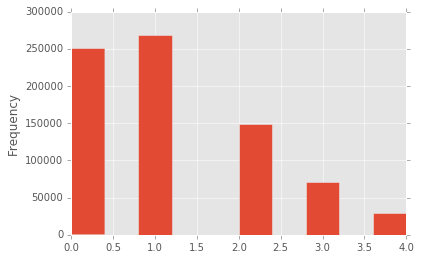

In [32]:
filtered_sites_df[2].plot.hist()

In [39]:
# get global coverage for each site

filtered_sites_df['rowsums'] = pd.Series(filtered_sites_df.iloc[:, 2:].sum(axis=1)) # axis=1 means sum over columns

In [40]:
filtered_sites_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,rowsums
0,Contig_29981,62,0,1,0,0,0,0,0,0,...,1,2,0,1,0,1,0,1,1,19
1,Contig_29981,63,1,1,0,0,0,1,0,0,...,1,3,0,1,0,1,0,1,1,25
2,Contig_29981,64,1,1,0,0,0,1,0,0,...,1,3,0,1,0,1,0,1,1,25
3,Contig_29981,65,1,1,0,0,0,1,0,0,...,1,3,0,1,0,1,0,1,1,27
4,Contig_29981,66,1,1,0,0,0,1,0,0,...,1,3,0,1,0,2,0,1,2,31


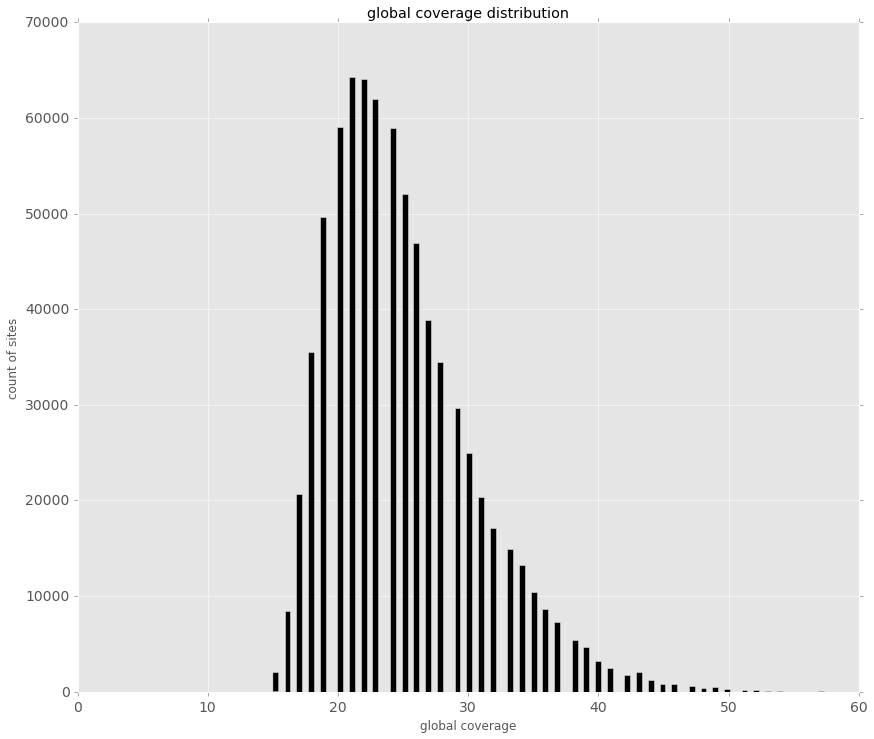

In [57]:
filtered_sites_df['rowsums'].plot.hist(figsize=(14,12), bins=100, color='k', fontsize=14)
plt.xlim(0, 60)
plt.xlabel("global coverage")
plt.ylabel("count of sites")
plt.title("global coverage distribution")
plt.savefig("global_coverage_dist_covFilteredSites.pdf")

## Code optimisation

### unoptimised

Restart kernel now!

In [1]:
%who

Interactive namespace is empty.


Define percentile funciton:

In [2]:
def compute_percentile_from_dict(my_dict, percentile):
    """
    my_dict : dictionary, containing depths as keys and their counts as values
    percentile : float in range of [0,100], percentile to compute, which must be between 0 and 100 inclusive.
    
    returns : key in my_dict that is less than or equal to the specified percentile of the distribution of "keys"
            (i. e. values are counts) stored in my_dict
    """
    assert percentile < 100 and percentile > 0, "percentile must be a number between 0 and 100"

    # get sum of counts
    total_cnt = sum(my_dict.values())
    
    perc = float() # initialise percentile of the coverage distribution
    cum_cnt = float()
    
    for d in sorted(my_dict.keys(), reverse=True): # search from the upper tail of the distribution
        cum_cnt += my_dict[d]
        perc = cum_cnt / total_cnt * 100
        if perc < (100 - percentile):
            continue
        else:
            return d

Open smaller test file:

In [3]:
import gzip

# get open file handle for gzipped depth file

depth_fh = gzip.open("samtools_depth_testFile.gz")

In [18]:
from collections import defaultdict

First read through file:

In [22]:
def first_run():
    # initialisze global coverage count dictionary
    global global_cov_dist
    global_cov_dist = defaultdict(int)

    depth_fh.seek(0) # go back to beginning of file

    # initialise individual coverage count dictionaries
    fields = depth_fh.readline().rstrip().split('\t')
    num_inds = len(fields[2:])
    global ind_cov_dists
    ind_cov_dists = dict([(ind, defaultdict(int)) for ind in range(num_inds)])

    depth_fh.seek(0) # seek back to beginning of file

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = fields[2:]
        # get global coverage
        across_sample_depth = sum([int(d) for d in depths])
        # count global coverages in dictionary
        global_cov_dist[across_sample_depth] += 1
        # count individual coverages in dictionaries
        for ind, d in enumerate(depths):
            ind_cov_dists[ind][int(d)] += 1 
            
    # set global coverage threshold to 90th percentile
    global global_coverage_threshold
    global_coverage_threshold = compute_percentile_from_dict(global_cov_dist, 90)
    
    # set indidivual coverage thresholds to 90th percentile
    global ind_coverage_thresholds
    ind_coverage_thresholds = [compute_percentile_from_dict(ind_cov_dists[ind], 90) for ind in range(num_inds)] 

Second read through file:

In [23]:
def second_run():
    global sites_kept
    sites_kept = 0

    depth_fh.seek(0) # restart reading file from beginning

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = fields[2:]
        across_sample_depth = sum([int(d) for d in depths])
        if across_sample_depth > global_coverage_threshold:
            continue
        excess_depth = False
        sufficient_depth = 0
        for ind, d in enumerate(depths):
            if int(d) > ind_coverage_thresholds[ind]:
                excess_depth = True
                break
            elif int(d) > 0:
                sufficient_depth += 1
        if not excess_depth and sufficient_depth >= 15:
            sites_kept += 1

In [24]:
%%time

first_run()
second_run()
print sites_kept

149648
CPU times: user 2min 12s, sys: 92 ms, total: 2min 12s
Wall time: 2min 12s


This is the time of the unoptimised code.

### optimised

Reduce the number of `for` loops:

In [25]:
def first_run():
    """
    first run through depth file
    """
    # initialisze global coverage count dictionary
    global global_cov_dist
    global_cov_dist = defaultdict(int)

    depth_fh.seek(0) # go back to beginning of file

    # initialise individual coverage count dictionaries
    fields = depth_fh.readline().rstrip().split('\t')
    num_inds = len(fields[2:])
    global ind_cov_dists
    ind_cov_dists = dict([(ind, defaultdict(int)) for ind in range(num_inds)])

    depth_fh.seek(0) # seek back to beginning of file

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = fields[2:]
        # get global coverage
        across_sample_depth = 0
        # count individual coverages in dictionaries
        for ind, d in enumerate(depths):
            ind_cov_dists[ind][int(d)] += 1
            across_sample_depth += int(d)
        # count global coverages in dictionary
        global_cov_dist[across_sample_depth] += 1
            
    # set global coverage threshold to 90th percentile
    global global_coverage_threshold
    global_coverage_threshold = compute_percentile_from_dict(global_cov_dist, 90)
    
    # set indidivual coverage thresholds to 90th percentile
    global ind_coverage_thresholds
    ind_coverage_thresholds = [compute_percentile_from_dict(ind_cov_dists[ind], 90) for ind in range(num_inds)] 

In [26]:
def second_run():
    """
    second run through depth file
    """
    global sites_kept
    sites_kept = 0

    depth_fh.seek(0) # restart reading file from beginning

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = fields[2:]
        excess_depth = False
        sufficient_depth = 0
        across_sample_depth = 0
        for ind, d in enumerate(depths):
            if int(d) > ind_coverage_thresholds[ind]:
                excess_depth = True
                break
            elif int(d) > 0:
                sufficient_depth += 1
            across_sample_depth += int(d)
        if not excess_depth and not across_sample_depth > global_coverage_threshold and sufficient_depth >= 15:
            sites_kept += 1

In [27]:
%%time

first_run()
second_run()
print sites_kept

149648
CPU times: user 1min 55s, sys: 32 ms, total: 1min 55s
Wall time: 1min 55s


This is only 17 seconds faster than the unoptimised code.

### Numba

In [28]:
import numpy as np
from numba.decorators import jit

In [49]:
@jit
def count_depths(depths):
    across_sample_depth = 0
    for ind, d in enumerate(depths):
        ind_cov_dists[ind][int(d)] += 1
        across_sample_depth += int(d)
    return across_sample_depth

In [50]:
def first_run():
    """
    first run through depth file
    """
    # initialisze global coverage count dictionary
    global global_cov_dist
    global_cov_dist = defaultdict(int)

    depth_fh.seek(0) # go back to beginning of file

    # initialise individual coverage count dictionaries
    fields = depth_fh.readline().rstrip().split('\t')
    num_inds = len(fields[2:])
    global ind_cov_dists
    ind_cov_dists = dict([(ind, defaultdict(int)) for ind in range(num_inds)])

    depth_fh.seek(0) # seek back to beginning of file

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = np.array(fields[2:]) # create numpy array
        # count depths
        across_sample_depth = count_depths(depths) # numba function
        # count global coverages in dictionary
        global_cov_dist[across_sample_depth] += 1
            
    # set global coverage threshold to 90th percentile
    global global_coverage_threshold
    global_coverage_threshold = compute_percentile_from_dict(global_cov_dist, 90)
    
    # set indidivual coverage thresholds to 90th percentile
    global ind_coverage_thresholds
    ind_coverage_thresholds = [compute_percentile_from_dict(ind_cov_dists[ind], 90) for ind in range(num_inds)] 

In [54]:
@jit
def check_depths(depths):
    across_sample_depth = 0
    excess_depth = False
    sufficient_depth = 0
    for ind, d in enumerate(depths):
        if int(d) > ind_coverage_thresholds[ind]:
            excess_depth = True
            return across_sample_depth, excess_depth, sufficient_depth
        elif int(d) > 0:
            sufficient_depth += 1
        across_sample_depth += int(d)
    return across_sample_depth, excess_depth, sufficient_depth

In [55]:
def second_run():
    """
    second run through depth file
    """
    global sites_kept
    sites_kept = 0

    depth_fh.seek(0) # restart reading file from beginning

    for line in depth_fh:
        fields = line.rstrip().split('\t')
        depths = np.array(fields[2:])

        # check depths
        across_sample_depth, excess_depth, sufficient_depth = check_depths(depths) # Numba function
        
        if not excess_depth and not across_sample_depth > global_coverage_threshold and sufficient_depth >= 15:
            sites_kept += 1

In [56]:
%%time

first_run()
second_run()
print sites_kept

149648
CPU times: user 6min 50s, sys: 272 ms, total: 6min 50s
Wall time: 6min 49s


OK, this even took 3 times than the unoptimised version.

This may be because Numba is not optimising and falling back on python code. With the following function decorators I am forcing Numba to optimise or throw an exception.

In [57]:
@jit(nopython=True)
def count_depths(depths):
    across_sample_depth = 0
    for ind, d in enumerate(depths):
        ind_cov_dists[ind][int(d)] += 1
        across_sample_depth += int(d)
    return across_sample_depth

In [58]:
@jit(nopython=True)
def check_depths(depths):
    across_sample_depth = 0
    excess_depth = False
    sufficient_depth = 0
    for ind, d in enumerate(depths):
        if int(d) > ind_coverage_thresholds[ind]:
            excess_depth = True
            return across_sample_depth, excess_depth, sufficient_depth
        elif int(d) > 0:
            sufficient_depth += 1
        across_sample_depth += int(d)
    return across_sample_depth, excess_depth, sufficient_depth

In [59]:
%%time

first_run()
second_run()
print sites_kept

TypeError: Caused By:
Traceback (most recent call last):
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 249, in run
    stage()
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 465, in stage_nopython_frontend
    self.locals)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 788, in type_inference_stage
    infer.build_constraint()
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 701, in build_constraint
    self.constrain_statement(inst)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 830, in constrain_statement
    self.typeof_assign(inst)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 888, in typeof_assign
    self.typeof_global(inst, inst.target, value)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 976, in typeof_global
    typ = self.context.resolve_value_type(gvar.value)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 233, in resolve_value_type
    return self._get_global_type(val)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 241, in _get_global_type
    return self._lookup_global(gv)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 295, in _lookup_global
    return self._globals[gv]
TypeError: unhashable type: 'dict'

Failed at nopython (nopython frontend)
unhashable type: 'dict'

# Revamp

I want to change excess and minimum coverage filtering from how it is done above.

First, I want to separate the excess and minimum coverage filtering.

## Excess coverage filtering

This should be based on SE read count per contig and should filter contigs, not sites. The coverage distribution (i. e. SE read per contig) should not contain the category 0, it should start from 1. 

I can derive such individual coverage percentiles from individual `bam` files, which could be read in parallel. I could also get an across sample coverage distribution in the process.

Once I have the individual and across sample coverage percentiles in a dictionary, I read in the same `bam` files again and record contigs with excess coverage. 

The result of this filtering should be a list of contigs to exclude. These contigs should be removed from a `bed` or `sites` file.

In [1]:
import glob

print glob.glob('*sorted.bam')

['ery_30-5_dedup.sorted.bam', 'par_34-12_dedup.sorted.bam', 'ery_30-3_dedup.sorted.bam', 'ery_30-11_dedup.sorted.bam', 'ery_30-14_dedup.sorted.bam', 'par_34-8_dedup.sorted.bam', 'ery_30-16_dedup.sorted.bam', 'par_34-13_dedup.sorted.bam', 'par_34-15_dedup.sorted.bam', 'par_34-9_dedup.sorted.bam', 'par_34-17_dedup.sorted.bam', 'ery_30-6_dedup.sorted.bam', 'ery_30-12_dedup.sorted.bam', 'ery_30-17_dedup.sorted.bam', 'par_34-6_dedup.sorted.bam', 'ery_30-1_dedup.sorted.bam', 'par_34-5_dedup.sorted.bam', 'par_34-14_dedup.sorted.bam', 'par_34-3_dedup.sorted.bam', 'par_34-1_dedup.sorted.bam', 'ery_30-9_dedup.sorted.bam', 'ery_30-18_dedup.sorted.bam', 'par_34-18_dedup.sorted.bam', 'ery_30-7_dedup.sorted.bam', 'par_34-10_dedup.sorted.bam', 'ery_30-10_dedup.sorted.bam', 'ery_30-8_dedup.sorted.bam', 'ery_30-15_dedup.sorted.bam', 'par_34-11_dedup.sorted.bam', 'par_34-2_dedup.sorted.bam', 'ery_30-4_dedup.sorted.bam', 'par_34-16_dedup.sorted.bam', 'par_34-7_dedup.sorted.bam', 'par_34-4_dedup.sorted.ba

In [2]:
import subprocess32 as sp # allows to call external programmes and  get their output

In [3]:
import numpy as np

In [4]:
# command line for testing

cmd = "samtools view -f 64 par_34-9_dedup.sorted.bam | gawk '$4==2' | cut -f 3 | uniq -c | gawk '{print $1}'"

The command line takes the SE reads from the bam file, filters out only those that map to position 2 on the contig (i. e. with correct mapping position), then extracts the contig name (in column 3) from the SAM record. Since the BAM file is already sorted I can `uniq` straight away while keeping the count of contig name (i. e. number of SE reads) and finally I am extracting only that count. The output of command line is the SE read count for each contig, one per line.

In [5]:
# read SE read count per contig into numpy array

a = np.fromstring( sp.check_output(cmd, shell=True), sep='\n', dtype=int ) 

In [56]:
np.fromstring?

In [6]:
a[:10]

array([60, 32,  5, 11, 17, 11, 32, 18, 33,  1])

In [7]:
# get 99th percentile of SE read coverage distribution

np.percentile(a, 99)

20.0

In [8]:
%%time

# read in all sorted BAM files and get their SE read coverage 99th percentile,
# store them in a dictionary with BAM file name as key

Q99_ind = {}

for file in glob.glob('*sorted.bam'):
    cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c | gawk '{print $1}'" % (file)
    #print cmd
    a = np.fromstring( sp.check_output(cmd, shell=True), sep='\n', dtype=int )
    Q99_ind[file] = np.percentile(a, 99)

CPU times: user 354 ms, sys: 80.8 ms, total: 434 ms
Wall time: 32.5 s


This is so fast, that I don't care about speeding this up. It's many orders of magnitude faster than parsing the `samtools depth` file.

In [52]:
for ind, Q in Q99_ind.items():
    print ind, Q

par_34-1_dedup.sorted.bam 14.0
par_34-15_dedup.sorted.bam 21.0
par_34-4_dedup.sorted.bam 19.0
ery_30-16_dedup.sorted.bam 25.0
ery_30-9_dedup.sorted.bam 27.0
par_34-5_dedup.sorted.bam 24.0
par_34-13_dedup.sorted.bam 19.0
par_34-3_dedup.sorted.bam 21.0
ery_30-3_dedup.sorted.bam 30.0
ery_30-10_dedup.sorted.bam 32.0
ery_30-14_dedup.sorted.bam 25.0
ery_30-7_dedup.sorted.bam 27.0
par_34-16_dedup.sorted.bam 22.0
par_34-14_dedup.sorted.bam 24.0
ery_30-15_dedup.sorted.bam 29.94
ery_30-1_dedup.sorted.bam 25.0
ery_30-11_dedup.sorted.bam 29.0
par_34-17_dedup.sorted.bam 21.0
par_34-2_dedup.sorted.bam 24.0
par_34-8_dedup.sorted.bam 22.0
ery_30-4_dedup.sorted.bam 30.0
par_34-9_dedup.sorted.bam 20.0
ery_30-6_dedup.sorted.bam 28.0
par_34-6_dedup.sorted.bam 21.0
par_34-7_dedup.sorted.bam 23.0
ery_30-12_dedup.sorted.bam 25.96
par_34-12_dedup.sorted.bam 20.0
ery_30-17_dedup.sorted.bam 26.0
ery_30-5_dedup.sorted.bam 29.0
par_34-10_dedup.sorted.bam 20.0
ery_30-18_dedup.sorted.bam 30.0
par_34-18_dedup.sorted

I now have individual 99 coverage percentiles. Remember that they do not include contigs with 0 coverage. If I had included the 0 count category, the 99th percentiles would obviously be much lower.

Next, I want to read in contig id and count for each `bam` file, check whether the count is above Q99 and if so, record the contig in separate list.

In [9]:
file = "par_34-9_dedup.sorted.bam"
cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c" % (file)
print cmd

samtools view -f 64 par_34-9_dedup.sorted.bam | gawk '$4==2' | cut -f 3 | uniq -c


This command line returns SE read count and contig name, one contig per line.

In [16]:
# open a connection (filehandle) to the standard output of the upper command line

pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout 

I can now iterate over that pipe as with a filehandle.

In [17]:
i = 0
for line in pipe:
    c, id = line.strip().split()
    print c, id
    i+=1
    if i > 10: break
pipe.close() # need to close the filehandle again

60 Contig_29981
32 Contig_368501
5 Contig_644939
11 Contig_368164
17 Contig_558718
11 Contig_123958
32 Contig_14335
18 Contig_368186
33 Contig_558321
1 Contig_500778
51 Contig_460360


In [41]:
pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout

In [42]:
excess_ind_cov = set() # list of id's of contig's with excess coverage
keep = set() # contigs to keep

for line in pipe:
    c, id = line.strip().split()
    if int(c) >= Q99_ind[file]:
        excess_ind_cov.add(id)
    else:
        keep.add(id)

pipe.close()

In [43]:
Q99_ind[file]

20.0

In [44]:
len(excess_ind_cov)

851

There are 851 contigs with SE read coverage above the 99th coverage percentile of this individual.

In [27]:
from collections import Counter

In [34]:
c = Counter(excess_ind_cov)

In [35]:
c.most_common(1)

[('Contig_69505', 1)]

In [36]:
2 in c.values()

False

In [45]:
len(keep)

80601

Now, let's collect all contig id's whose SE read coverage is above the 99th percentile in any of the 36 individuals here.

In [46]:
%%time

excess_ind_cov = set() # set of contig ids's from contigs with excess coverage

for file in glob.glob('*sorted.bam'):
    cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c" % (file)
    #print cmd
    pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout
    for line in pipe:
        c, id = line.strip().split()
        if int(c) > Q99_ind[file]:
            excess_ind_cov.add(id)
    pipe.close()

CPU times: user 11.1 s, sys: 150 ms, total: 11.3 s
Wall time: 32.3 s


In [47]:
list(excess_ind_cov)[:10]

['Contig_99063',
 'Contig_682517',
 'Contig_9017',
 'Contig_173683',
 'Contig_4106',
 'Contig_61141',
 'Contig_73470',
 'Contig_231602',
 'Contig_4108',
 'Contig_370095']

In [48]:
len(excess_ind_cov)

2173

With the `R` `quantile` function and `print_Q99_exCov_contigs.pl` I had found 2192 contigs. This is close enough.

While reading in the SE read coverage from all contigs for each individual, I could also at the same time determine the across sample coverage for each contig.

In [49]:
from collections import defaultdict

In [59]:
%%time

excess_ind_cov = set() # set of contig ids's from contigs with excess individual coverage
excess_global_cov = set() # excess across sample coverage
across_sample_cov = defaultdict(int)
keep = set() # set of contig id's to keep for downstream analysis

for file in glob.glob('*sorted.bam'):
    cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c" % (file)
    #print cmd
    pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout
    for line in pipe:
        cov, contig = line.strip().split()
        if int(cov) > Q99_ind[file]:
            excess_ind_cov.add(contig)
        else:
            keep.add(contig)
        across_sample_cov[contig] += int(cov)
    pipe.close()
    
print "{0:d} contigs passed individual coverage filtering".format(len(keep))
    
Q99_across_sample = np.percentile(across_sample_cov.values(), 99.0)
    
for contig, cov in across_sample_cov.items():
    if cov > Q99_across_sample:
        excess_global_cov.add(contig)

# Return a new set with elements in the set 'keep' that are not in the set 'excess_cov':
keep_contigs = keep.difference(excess_global_cov) 

print "{0:d} contigs passed individual and across sample coverage filtering".format(len(keep_contigs))

580748 contigs passed individual coverage filtering
575239 contigs passed individual and across sample coverage filtering
CPU times: user 19.1 s, sys: 582 ms, total: 19.7 s
Wall time: 35 s


In [54]:
Q99_across_sample

148.0

The across sample 99th coverage percentile looks reasonable.

In [60]:
len(excess_ind_cov)

2173

In [61]:
len(excess_global_cov)

5792

In [62]:
# number of contigs that passed individual coverage filtering
# but not global coverage filtering

len(excess_global_cov.difference(excess_ind_cov))

3672

In [63]:
# number of contigs that did not pass individual coverage filtering
# or global coverage filtering or both

len(excess_ind_cov.union(excess_global_cov))

5845

In [ ]:
# get all contig ids from contigs that failed one of the
# coverage filters

excess_cov_contigs = excess_ind_cov.union(excess_global_cov)

This would be a list that I could use to filter `bed` or `depth` or `sites` files.

In [53]:
np.percentile?

I don't like the standard interpolation (because I don't understand what it does). I think 'lower' should be ok.

I am going to try some code that only needs to read in the BAM files once.

In [1]:
from glob import glob

In [2]:
import subprocess32 as sp

In [3]:
import numpy as np

In [4]:
from collections import defaultdict

In [8]:
%%time

#
# initialise data structures
#
# set of contig ids's from contigs with excess individual coverage:
excess_ind_cov = set()
# stores contig id's with excess across sample coverage:
excess_global_cov = set()
# stores individual coverage distributions:
ind_sample_cov = dict([(file, defaultdict(int)) for file in glob('*sorted.bam')])
# stores across sample coverage distribution:
across_sample_cov = defaultdict(int)
# stores 99th coverage percentile for each individual:
Q99_ind = {}
# list of contigs with SE read mappings from any individual:
all_contigs = set() # contigs with only PE read mappings are completely ignored

# get coverage distributions
for file in glob('*sorted.bam'):
    cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c" % (file)
    pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout
    for line in pipe:
        cov, contig = line.strip().split()
        ind_sample_cov[file][contig] += int(cov)
        Q99_ind[file] = 0 # initialise dict
        all_contigs.add(contig)
        across_sample_cov[contig] += int(cov)
    pipe.close()

# get 99th percentiles of individual coverage distributions
for file in glob('*sorted.bam'):
    Q99_ind[file] = np.percentile(ind_sample_cov[file].values(), 99.0, interpolation='lower')

# get 99th percentile of across sample coverage distribution
Q99_across_sample = np.percentile(across_sample_cov.values(), 99.0, interpolation='lower')

# check contigs for excess global, then individual coverage
for contig in all_contigs:
    if across_sample_cov[contig] > Q99_across_sample:
        excess_global_cov.add(contig)
        continue
    for file in glob('*sorted.bam'):
        if ind_sample_cov[file][contig] > Q99_ind[file]:
            excess_ind_cov.add(contig)
            break

# Return a new set with elements in the set 'keep' that are not in the set 'excess_cov':
keep_contigs = all_contigs.difference(excess_global_cov, excess_ind_cov) 

print "{0:d} contigs passed individual and across sample coverage filtering".format(len(keep_contigs))

575187 contigs passed individual and across sample coverage filtering
CPU times: user 1min 49s, sys: 29.2 s, total: 2min 18s
Wall time: 2min 34s


I would like to tim individual parts of the previous code cell.

In [9]:
%%time

#
# initialise data structures
#
# set of contig ids's from contigs with excess individual coverage:
excess_ind_cov = set()
# stores contig id's with excess across sample coverage:
excess_global_cov = set()
# stores individual coverage distributions:
ind_sample_cov = dict([(file, defaultdict(int)) for file in glob('*sorted.bam')])
# stores across sample coverage distribution:
across_sample_cov = defaultdict(int)
# stores 99th coverage percentile for each individual:
Q99_ind = {}
# list of contigs with SE read mappings from any individual:
all_contigs = set() # contigs with only PE read mappings are completely ignored

# get coverage distributions
for file in glob('*sorted.bam'):
    cmd = "samtools view -f 64 %s | gawk '$4==2' | cut -f 3 | uniq -c" % (file)
    pipe = sp.Popen(cmd, shell=True, stdout=sp.PIPE).stdout
    for line in pipe:
        cov, contig = line.strip().split()
        ind_sample_cov[file][contig] += int(cov)
        Q99_ind[file] = 0 # initialise dict
        all_contigs.add(contig)
        across_sample_cov[contig] += int(cov)
    pipe.close()

CPU times: user 17.8 s, sys: 928 ms, total: 18.7 s
Wall time: 34.2 s


In [10]:
%%time

# get 99th percentiles of individual coverage distributions
for file in glob('*sorted.bam'):
    Q99_ind[file] = np.percentile(ind_sample_cov[file].values(), 99.0, interpolation='lower')

# get 99th percentile of across sample coverage distribution
Q99_across_sample = np.percentile(across_sample_cov.values(), 99.0, interpolation='lower')

CPU times: user 424 ms, sys: 20 ms, total: 444 ms
Wall time: 442 ms


In [11]:
%%time

# check contigs for excess global, then individual coverage
for contig in all_contigs:
    if across_sample_cov[contig] > Q99_across_sample:
        excess_global_cov.add(contig)
        continue
    for file in glob('*sorted.bam'):
        if ind_sample_cov[file][contig] > Q99_ind[file]:
            excess_ind_cov.add(contig)
            break

CPU times: user 1min 30s, sys: 27.9 s, total: 1min 58s
Wall time: 1min 58s


Clearly, that is the "slow" part.

In [12]:
len(all_contigs)

581032

In [13]:
%%time

# Return a new set with elements in the set 'keep' that are not in the set 'excess_cov':

keep_contigs = all_contigs.difference(excess_global_cov, excess_ind_cov) 

print "{0:d} contigs passed individual and across sample coverage filtering".format(len(keep_contigs))

575187 contigs passed individual and across sample coverage filtering
CPU times: user 134 ms, sys: 8.49 ms, total: 143 ms
Wall time: 143 ms


---

Briefly try numba.

In [19]:
a = np.array(all_contigs, dtype='str')

In [20]:
a.dtype

dtype('S64')

In [21]:
from numba import jit

In [23]:
@jit(nopython=True)
def check_excess_cov(all_contigs):
    for contig in all_contigs:
        if across_sample_cov[contig] > Q99_across_sample:
            excess_global_cov.add(contig)
            continue
        for file in glob('*sorted.bam'):
            if ind_sample_cov[file][contig] > Q99_ind[file]:
                excess_ind_cov.add(contig)
                break
    return excess_global_cov, excess_ind_cov

In [24]:
b, c = check_excess_cov(a)

TypeError: Caused By:
Traceback (most recent call last):
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 249, in run
    stage()
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 465, in stage_nopython_frontend
    self.locals)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/compiler.py", line 788, in type_inference_stage
    infer.build_constraint()
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 701, in build_constraint
    self.constrain_statement(inst)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 830, in constrain_statement
    self.typeof_assign(inst)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 888, in typeof_assign
    self.typeof_global(inst, inst.target, value)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 976, in typeof_global
    typ = self.context.resolve_value_type(gvar.value)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 233, in resolve_value_type
    return self._get_global_type(val)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 241, in _get_global_type
    return self._lookup_global(gv)
  File "/usr/local/anaconda2/lib/python2.7/site-packages/numba/typing/context.py", line 295, in _lookup_global
    return self._globals[gv]
TypeError: unhashable type: 'dict'

Failed at nopython (nopython frontend)
unhashable type: 'dict'

---

In [26]:
bed = "Big_Data_Contigs.noSEgt2.noDUST.bed"

In [27]:
bed.replace(".bed", ".COVfiltered.bed")

'Big_Data_Contigs.noSEgt2.noDUST.COVfiltered.bed'

In [28]:
bed_in = open("Big_Data_Contigs.noSEgt2.noDUST.bed")

In [29]:
bed_out = open("Big_Data_Contigs.noSEgt2.noDUST.bed".replace(".bed", ".COVfiltered.bed"), "w")

In [30]:
for line in bed_in:
    contig, _, _ = line.strip().split()
    if contig in keep_contigs:
        bed_out.write(line)

In [31]:
bed_in.close()
bed_out.close()

## Minimum coverage filtering

This would require a `samtools depth` file. It should do the same thing as `even_depth.pl`.

In [43]:
# open gzipped depth file

import gzip

depth_fh = gzip.open("ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.depth.gz")

In [37]:
# iterate of lines of file and split into array

i = 0
for line in depth_fh:
    i+=1
    fields = line.strip().split()
    if i>10: break

depth_fh.close()

In [41]:
# count number of individuals with > x coverage

import numpy as np

i = 0
for line in depth_fh:
    i+=1
    fields = line.strip().split()
    depths = np.array(fields[2:], dtype='int8')
    print depths
    if i>10: break

depth_fh.close()

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [44]:
# count number of individuals with > x coverage

import numpy as np

i = 0
for line in depth_fh:
    i+=1
    fields = line.strip().split()
    depths = np.array(fields[2:], dtype='int8')
    print depths >= 1
    if i>10: break

depth_fh.close()

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False]
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False]
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False]
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False]
[False  True False False False False False False False False False False
 False False False False False False False Fals

In [45]:
# count number of individuals with > x coverage

depth_fh = gzip.open("ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.depth.gz")

import numpy as np

i = 0
for line in depth_fh:
    i+=1
    fields = line.strip().split()
    depths = np.array(fields[2:], dtype='int8')
    print sum( depths >= 1 )
    if i>10: break

depth_fh.close()

3
3
3
3
3
3
3
3
3
3
3


In [51]:
# if enough individuals have > x coverage, print out the line, otherwise skip that site

depth_fh = gzip.open("ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.depth.gz")

import numpy as np

i = 0
for line in depth_fh:
    i+=1
    fields = line.strip().split()
    depths = np.array(fields[2:], dtype='int8')
    if sum( depths >= 1 ) >= 15:
        print line
    if i>600: break

depth_fh.close()

Contig_41949	8	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	9	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	10	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	11	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	12	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	13	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	14	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	15	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	16	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	17	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	18	1	3	0	4	3	3	0	0	1	0	0	1	0	1	0	5	0	4	0	0	0	1	1	0	0	0	0	0	1	0	0	3	1	2	0	0

Contig_41949	19	1	3	0	4

OK, this seems to work.

I have put the upper code in a script called `minimum_coverage_filter.py`.

Minimum coverage filtering on a samtools depth file is very slow. It took 2h 35 minutes to complete.

## check output

In [1]:
import pandas as pd

In [2]:
% ll *sites.gz

-rw-rw-r-- 1 claudius 5394164 May  7 17:50 ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.1.15.sites.gz


Unfortunately, I have let `minimum_coverage_filter.py` output only contig id and position, since that is all I need for ANGSD analysis. However, now I cannot get coverage distributions from the filtered sites. I have changed `minimum_coverage_filter.py` to print out the depth information for retained sites as well. The file is not very large anyway, when gzipped.

In order to get coverage distributions over these filtered sites, I can turn the *sites.gz file into a BED file with my script `sites2bed.pl`. I can then use this for another `samtools depth` command, which should be fairly quick.

In [3]:
% ll *depth.gz

-rw-rw-r-- 1 claudius   9563013 May  7 18:38 ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.1.15.depth.gz
-rw-rw-r-- 1 claudius 304419385 May  7 13:34 ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.depth.gz
-rw-rw-r-- 1 claudius 319803427 Apr 29 17:47 ParEry.noSEgt2.noDUST.noTGCAGG.depth.gz
-rw-rw-r-- 1 claudius   7027655 May  5 14:47 ParEry.noSEgt2.nogtQ99Cov.noDUST.1.15.depth.gz
-rw-rw-r-- 1 claudius 326122152 May  5 13:52 ParEry.noSEgt2.nogtQ99Cov.noDUST.depth.gz


In [4]:
# read compressed TAB-delimited file directly into pandas data frame

filtered_sites_df = pd.read_table("ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.1.15.depth.gz", header=None)

In [5]:
filtered_sites_df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,Contig_41949,8,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0
1,Contig_41949,9,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0
2,Contig_41949,10,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0
3,Contig_41949,11,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0
4,Contig_41949,12,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0
5,Contig_41949,13,1,3,0,4,3,3,0,0,...,0,0,1,0,0,3,1,2,0,0


In [6]:
# get basix statistics from the coverage table

filtered_sites_df.iloc[:, 2:].describe()

,2,3,4,5,6,7,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
count,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,...,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06,2.683395e+06
mean,1.929379e+00,1.630075e+00,1.220359e+00,1.050827e+00,1.222843e+00,1.701823e+00,1.261789e+00,1.372002e+00,1.725308e+00,1.181697e+00,...,8.331215e-01,2.962553e-01,9.800909e-01,8.358020e-01,6.237427e-01,1.077075e+00,7.978155e-01,9.008454e-01,8.817416e-01,7.312651e-01
std,1.980922e+00,1.732432e+00,1.414041e+00,1.316840e+00,1.437516e+00,1.798782e+00,1.447722e+00,1.548128e+00,1.804316e+00,1.395880e+00,...,1.162850e+00,6.232341e-01,1.312636e+00,1.156669e+00,9.700308e-01,1.398606e+00,1.132069e+00,1.231474e+00,1.207030e+00,1.071054e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.900000e+01,1.800000e+01,1.600000e+01,2.300000e+01,1.500000e+01,2.100000e+01,1.800000e+01,2.200000e+01,1.900000e+01,1.800000e+01,...,1.800000e+01,9.000000e+00,2.200000e+01,1.600000e+01,1.200000e+01,2.500000e+01,2.000000e+01,2.400000e+01,1.900000e+01,1.600000e+01


In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
import matplotlib

matplotlib.style.use('ggplot')

In [10]:
# get global coverage for each site

filtered_sites_df['rowsums'] = pd.Series(filtered_sites_df.iloc[:, 2:].sum(axis=1)) 
# axis=1 means sum over columns

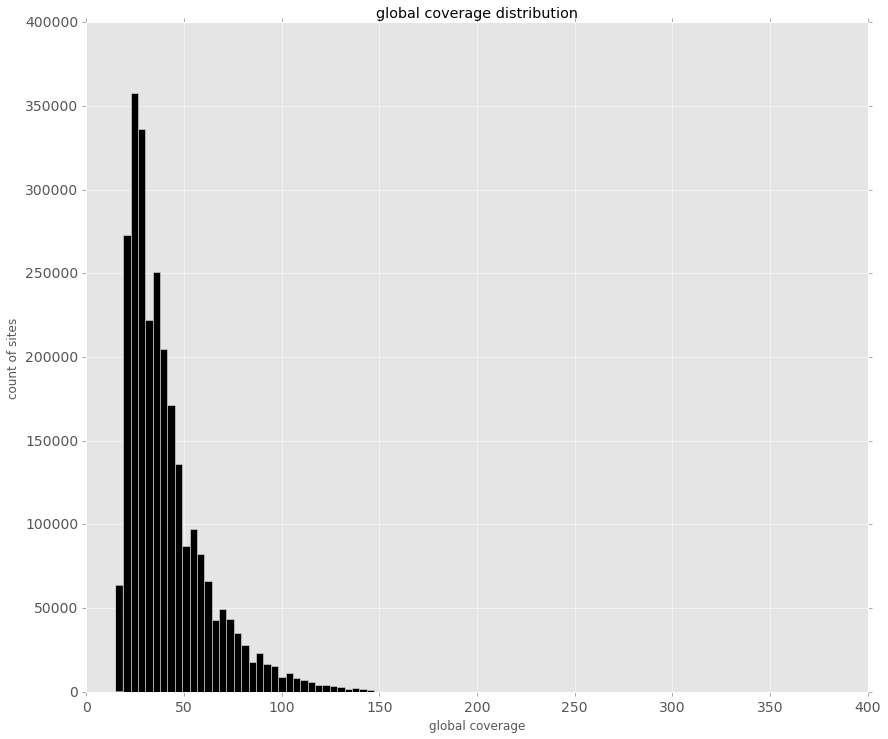

In [20]:
filtered_sites_df['rowsums'].plot.hist(figsize=(14,12), bins=100, color='k', fontsize=14)
#plt.xlim(0, 200)
plt.xlabel("global coverage")
plt.ylabel("count of sites")
plt.title("global coverage distribution")
plt.savefig("ParEry.noSEgt2.noDUST.COVfiltered.noTGCAGG.1.15.GlobalCovDist.pdf")

In [14]:
pd.DataFrame.plot.hist?

The bins are difficult to set. I am going to create the histogram with R. matplotlib seems to be incapable of producing a full resolution histogram without artefacts.

Besides the artefacts, the across sample coverage distribution of excess coverage filtered and minimum coverage filtered sites looks good. Much better from previous coverage filtering (see above)! There are negligibly few sites with coverage above the 99th percentile of across-sample SE read coverage (148).